In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, t

In [2]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting

,site,time,riskLevelLabel
0,ukc1101-06000,2020-05-14,0
1,ukc1101-06000,2020-05-15,0
2,ukc1101-06000,2020-05-16,0
3,ukc1101-06000,2020-05-17,0
4,ukc1101-06000,2020-05-18,0
...,...,...,...
187106,ukk4307-33900,2022-09-26,0
187107,ukk4307-33900,2022-09-27,0
187108,ukk4307-33900,2022-09-28,0
187109,ukk4307-33900,2022-09-29,0


In [3]:
feature_neg = pd.read_csv('~data/feature_extraction_15x15_neg10.csv')
feature_neg

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,2020-01-01,ukc1101-06000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000
1,2020-01-01,ukc1101-06100,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000
2,2020-01-01,ukc1101-06200,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000
3,2020-01-01,ukc1202-06300,-10.0,-10.0,2.275929,0.160749,4.534724,2.531511,-10.0,-10.0,...,2.275929,0.160749,4.534724,2.531511,-10.0,-10.0,2.275929,0.160749,4.534724,2.531511
4,2020-01-01,ukc1202-06400,-10.0,-10.0,2.215205,0.155033,4.743151,2.385542,-10.0,-10.0,...,2.215205,0.155033,4.743151,2.385542,-10.0,-10.0,2.215205,0.155033,4.743151,2.385542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471275,2022-12-31,ukk4306-22800,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000
471276,2022-12-31,ukk4306-22900,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000
471277,2022-12-31,ukk4306-23000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000
471278,2022-12-31,ukk4307-33800,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.0,-10.000000,-10.000000,-10.000000,-10.000000


In [4]:
feature_zero = pd.read_csv('~data/feature_extraction_15x15_zero.csv')
feature_zero

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,2020-01-01,ukc1101-06000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2020-01-01,ukc1101-06100,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2020-01-01,ukc1101-06200,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,2020-01-01,ukc1202-06300,0.0,0.0,2.275929,0.160749,4.534724,2.531511,0.0,0.0,...,2.275929,0.160749,4.534724,2.531511,0.0,0.0,2.275929,0.160749,4.534724,2.531511
4,2020-01-01,ukc1202-06400,0.0,0.0,2.215205,0.155033,4.743151,2.385542,0.0,0.0,...,2.215205,0.155033,4.743151,2.385542,0.0,0.0,2.215205,0.155033,4.743151,2.385542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471275,2022-12-31,ukk4306-22800,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
471276,2022-12-31,ukk4306-22900,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
471277,2022-12-31,ukk4306-23000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
471278,2022-12-31,ukk4307-33800,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


# Feature Value Comparison

### Feature Dataset filled with Neg

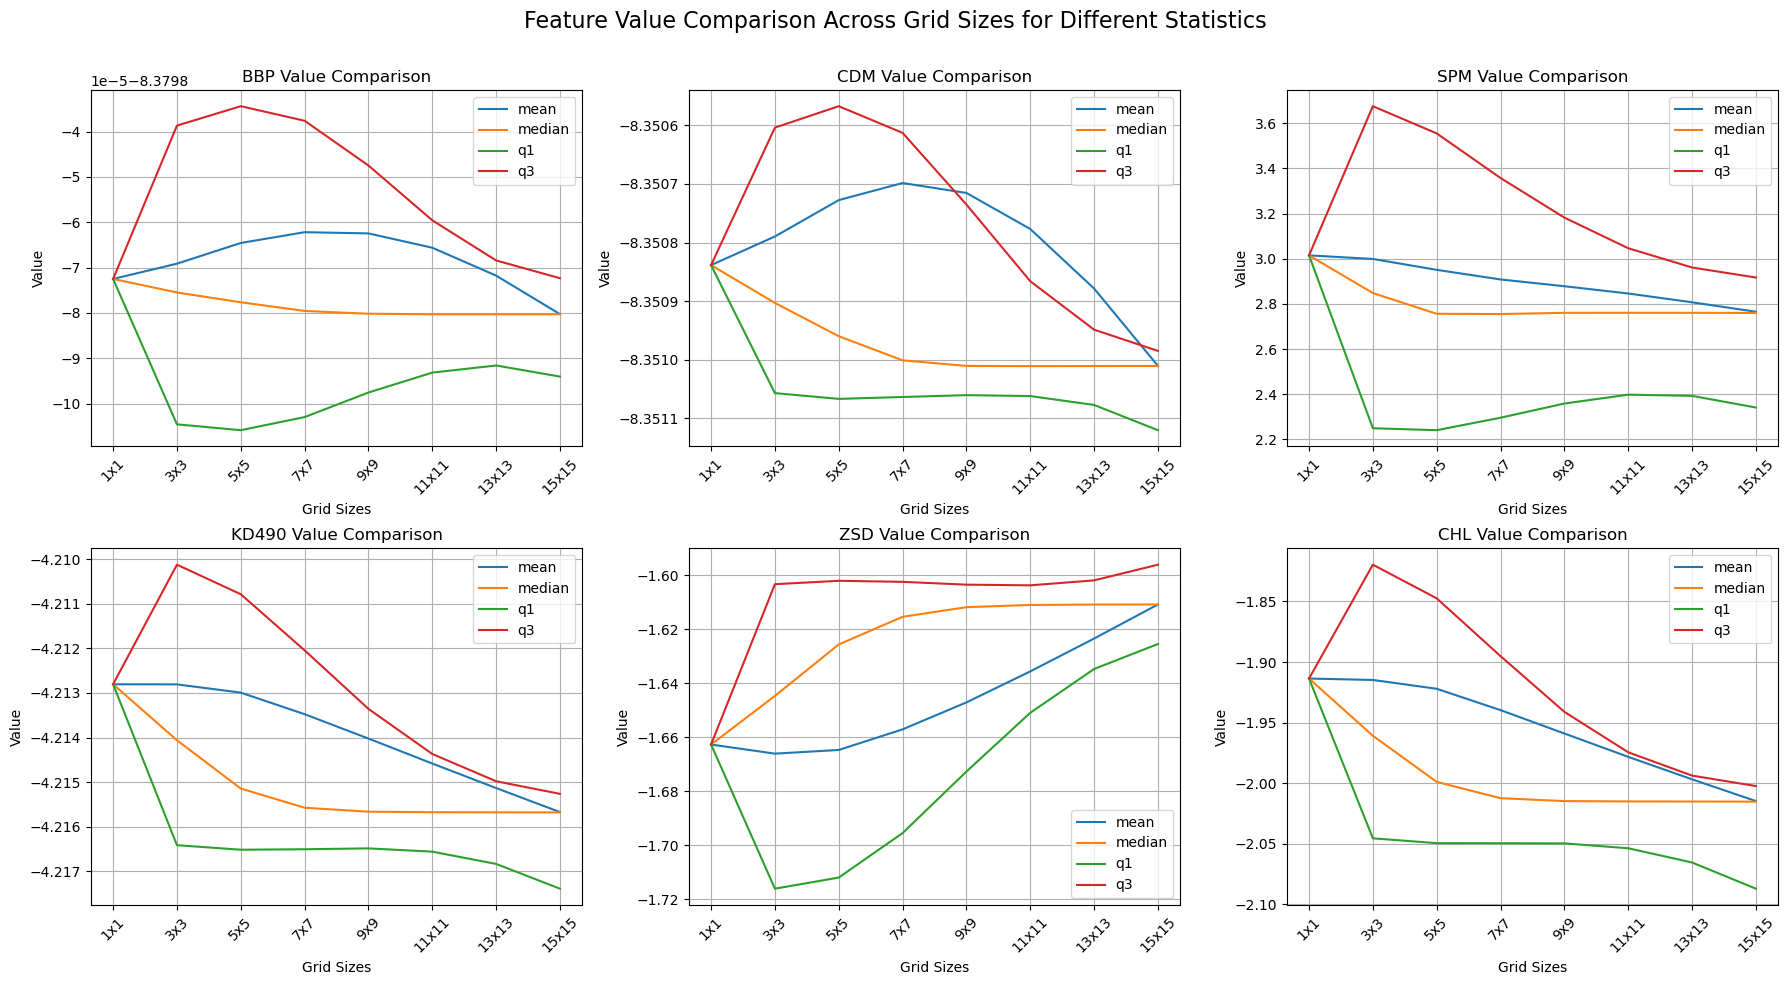

In [5]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Value Comparison Across Grid Sizes for Different Statistics', fontsize=16)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_neg[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison')
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=45)
    ax.set_ylabel('Value')
    ax.set_xlabel('Grid Sizes')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [6]:
data = []

for col in feature_neg.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature_neg[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean_neg = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean_neg

,feature,size,statistics,mean
0,BBP,1x1,median,-8.379872
1,CDM,1x1,median,-8.350839
2,SPM,1x1,median,3.014654
3,KD490,1x1,median,-4.212805
4,ZSD,1x1,median,-1.662674
...,...,...,...,...
187,CDM,15x15,q3,-8.350985
188,SPM,15x15,q3,2.916493
189,KD490,15x15,q3,-4.215261
190,ZSD,15x15,q3,-1.596026


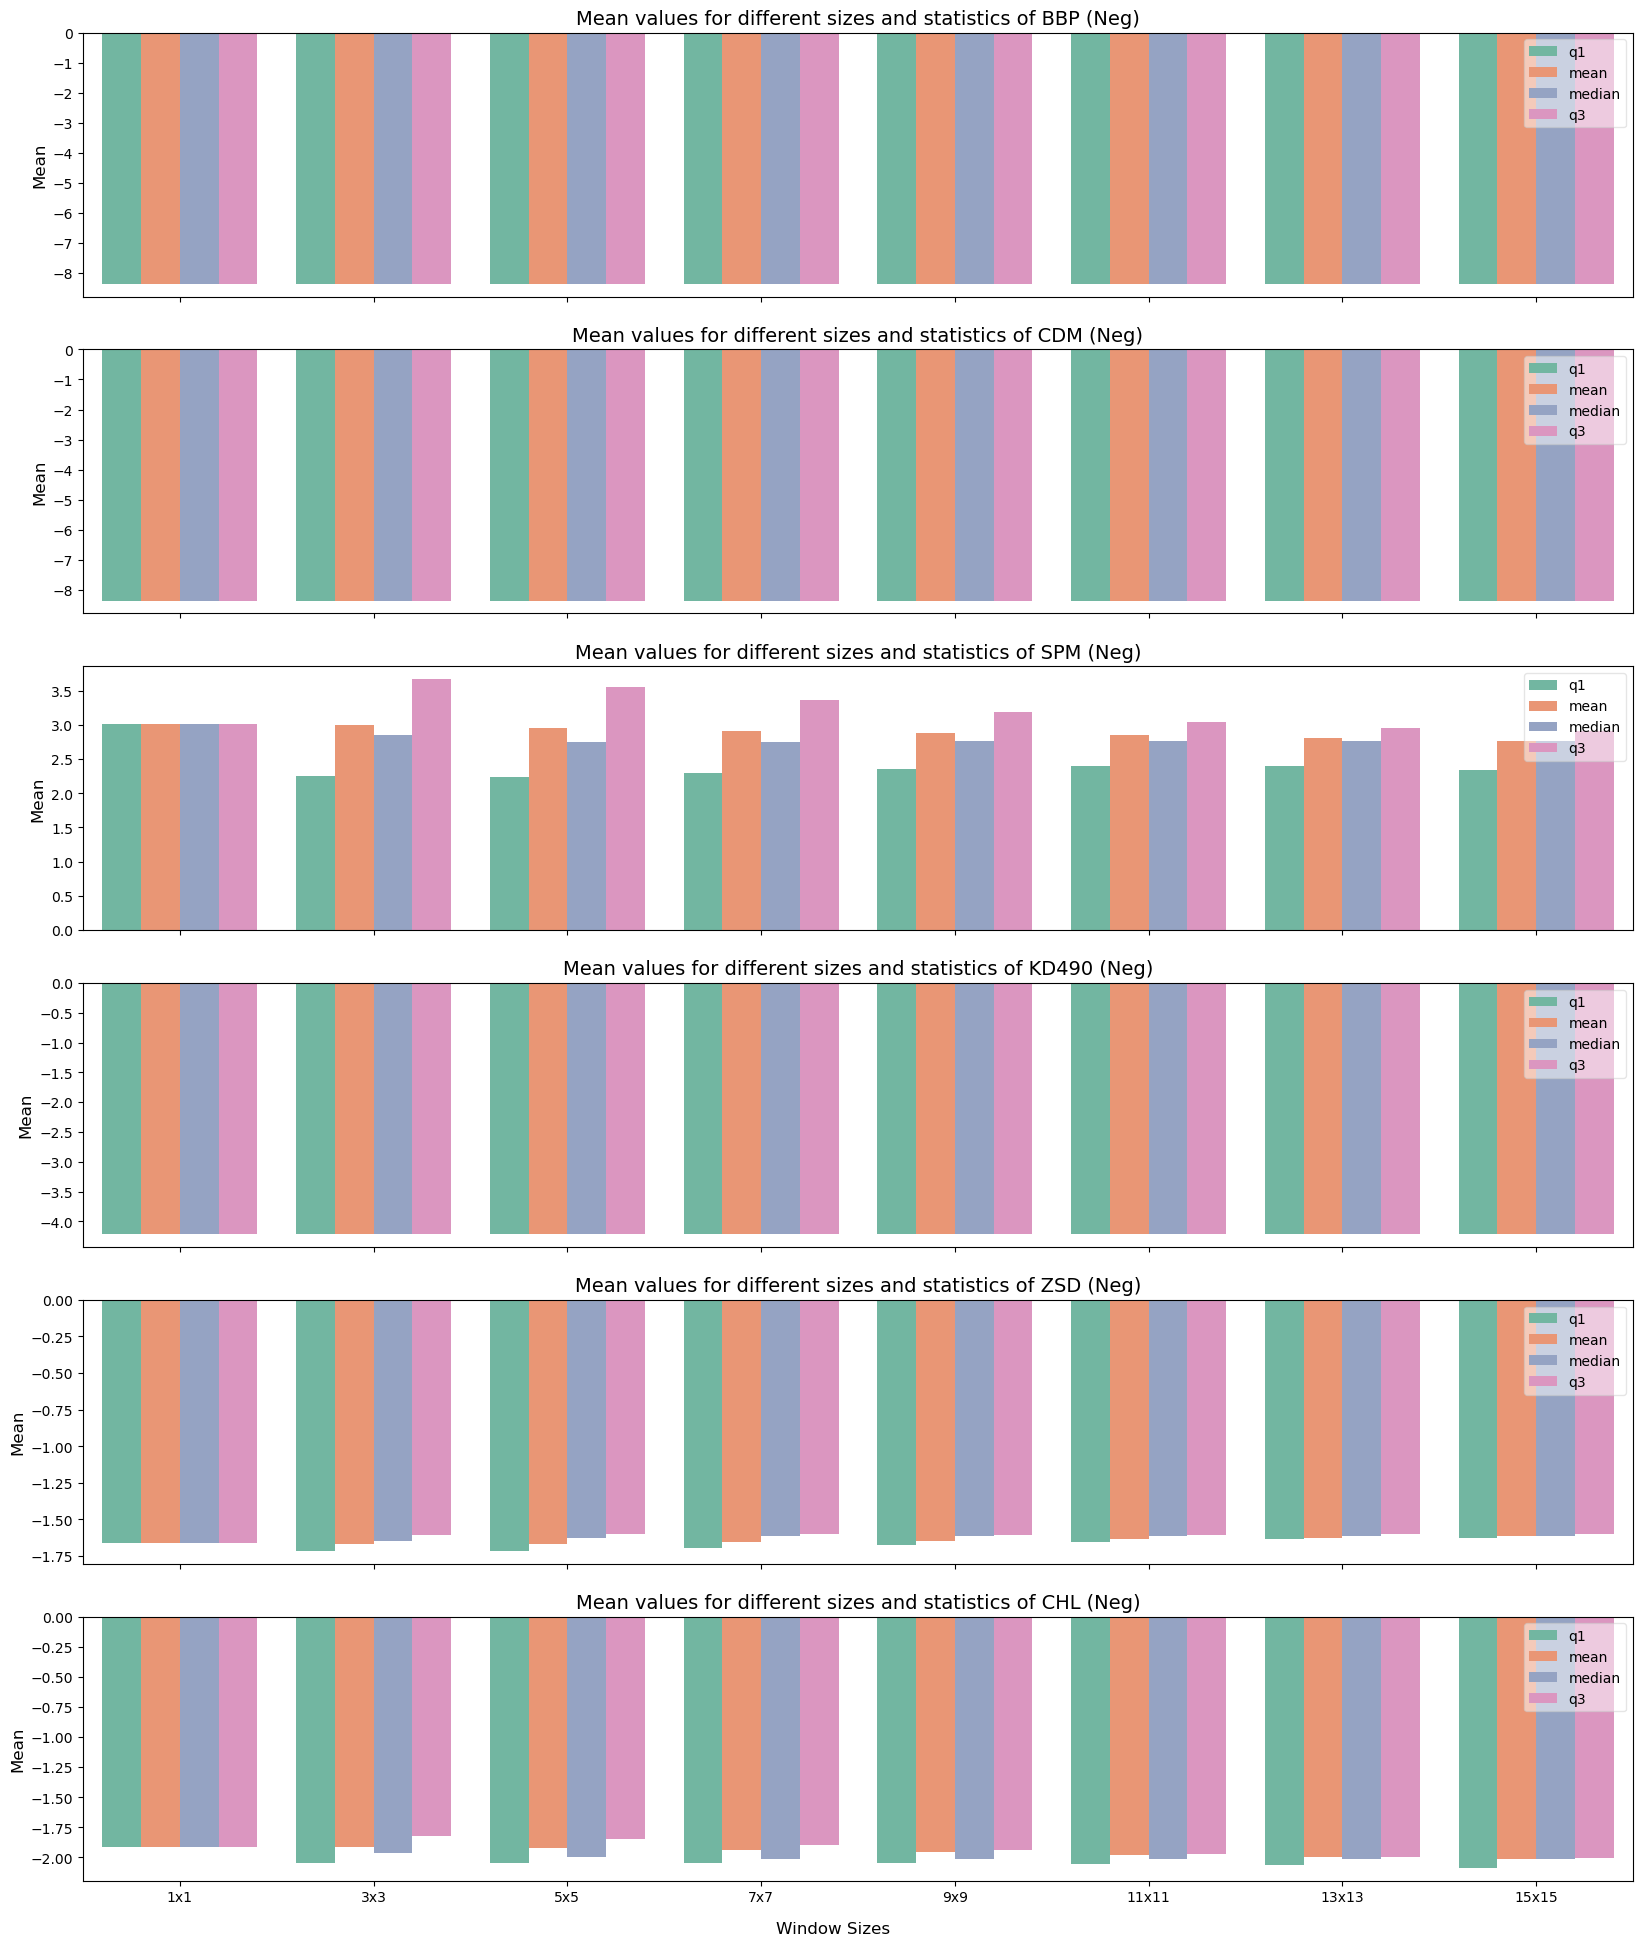

In [7]:
features = feature_mean_neg['feature'].unique()
feature_mean_neg['size_num'] = feature_mean_neg['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean_neg[feature_mean_neg['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat} (Neg)', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

### Feature Dataset filled with Zero

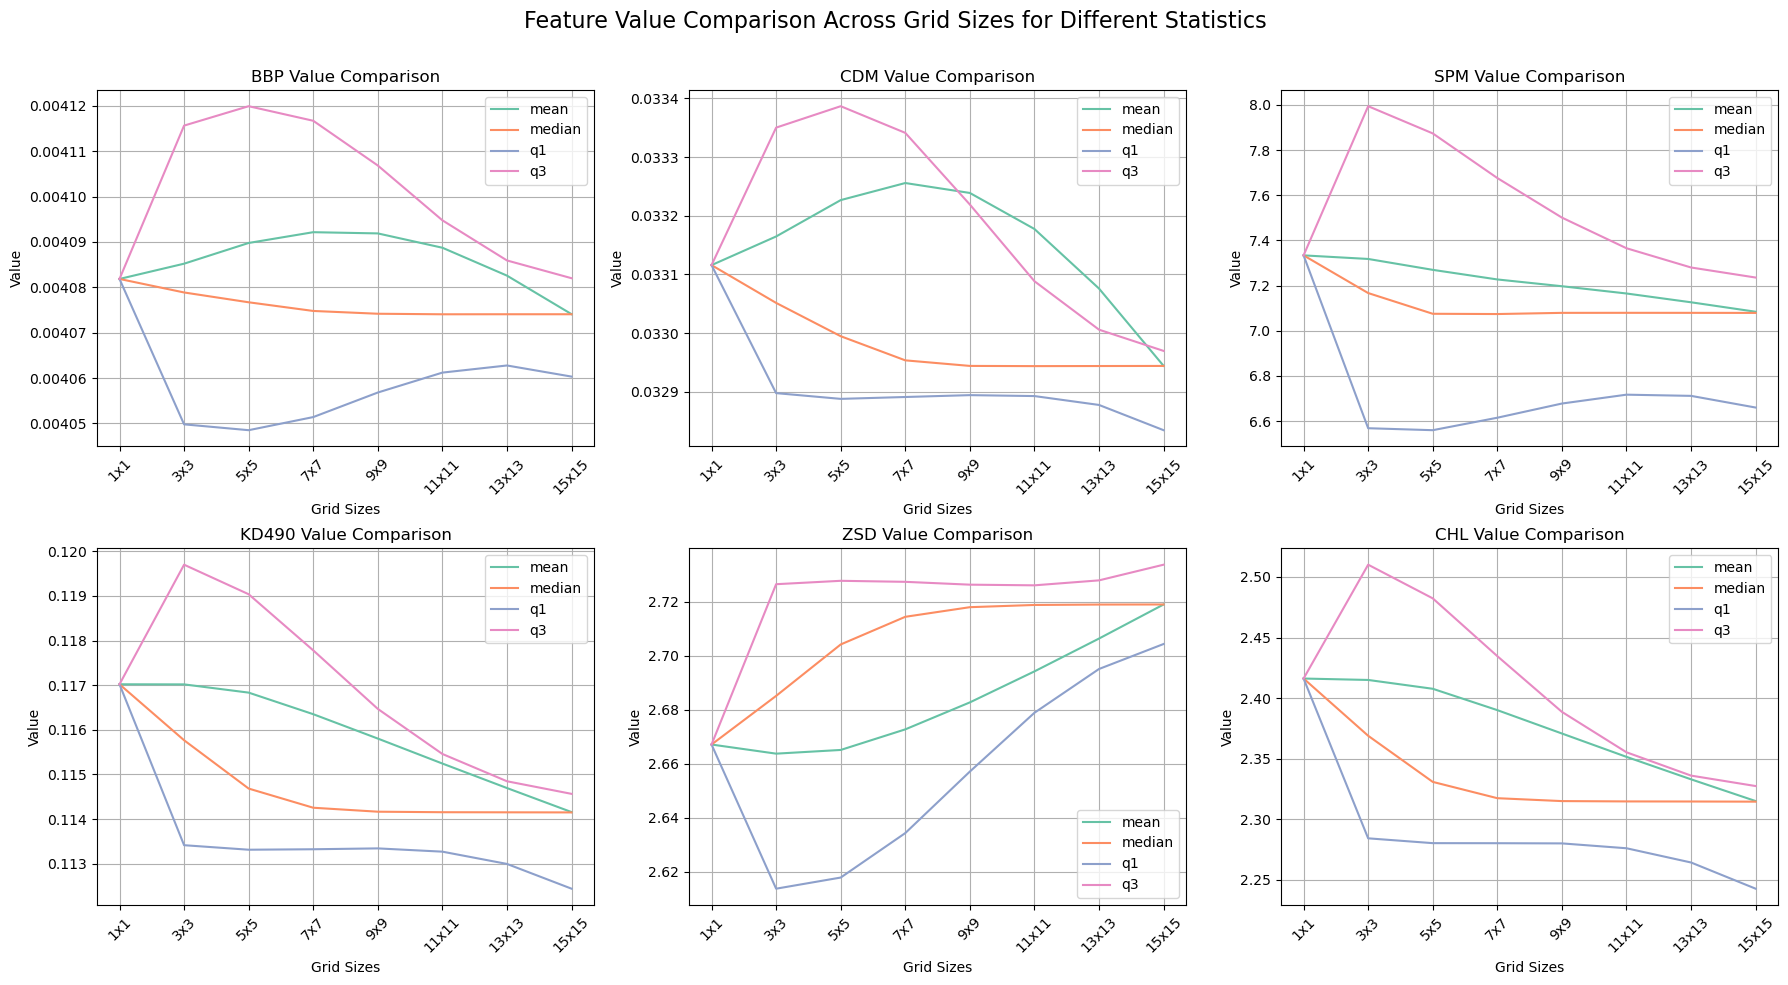

In [8]:
features = ['BBP', 'CDM', 'SPM', 'KD490', 'ZSD', 'CHL']
sizes = ['1x1', '3x3', '5x5', '7x7', '9x9', '11x11', '13x13', '15x15']
statistics = ['mean', 'median', 'q1', 'q3']

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Value Comparison Across Grid Sizes for Different Statistics', fontsize=16)

for ax, feature in zip(axs.ravel(), features):
    
    for statistic in statistics:
        columns = [f'{feature}_{res}_{statistic}' for res in sizes]
        feature_zero[columns].mean().plot(ax=ax, label=statistic) 
        
    ax.set_title(f'{feature} Value Comparison')
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels(sizes, rotation=45)
    ax.set_ylabel('Value')
    ax.set_xlabel('Grid Sizes')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [9]:
data = []

for col in feature_zero.columns:
    if col not in ['time', 'site']:
        feat, size_stat = col.split('_')[0], '_'.join(col.split('_')[1:])
        size, statistic = size_stat.split('_')[0], '_'.join(size_stat.split('_')[1:])
        
        mean_value = feature_zero[col].mean()

        data.append([feat, size, statistic, mean_value])

feature_mean_zero = pd.DataFrame(data, columns=['feature', 'size', 'statistics', 'mean'])
feature_mean_zero

,feature,size,statistics,mean
0,BBP,1x1,median,0.004082
1,CDM,1x1,median,0.033116
2,SPM,1x1,median,7.333551
3,KD490,1x1,median,0.117020
4,ZSD,1x1,median,2.667152
...,...,...,...,...
187,CDM,15x15,q3,0.032970
188,SPM,15x15,q3,7.235390
189,KD490,15x15,q3,0.114564
190,ZSD,15x15,q3,2.733800


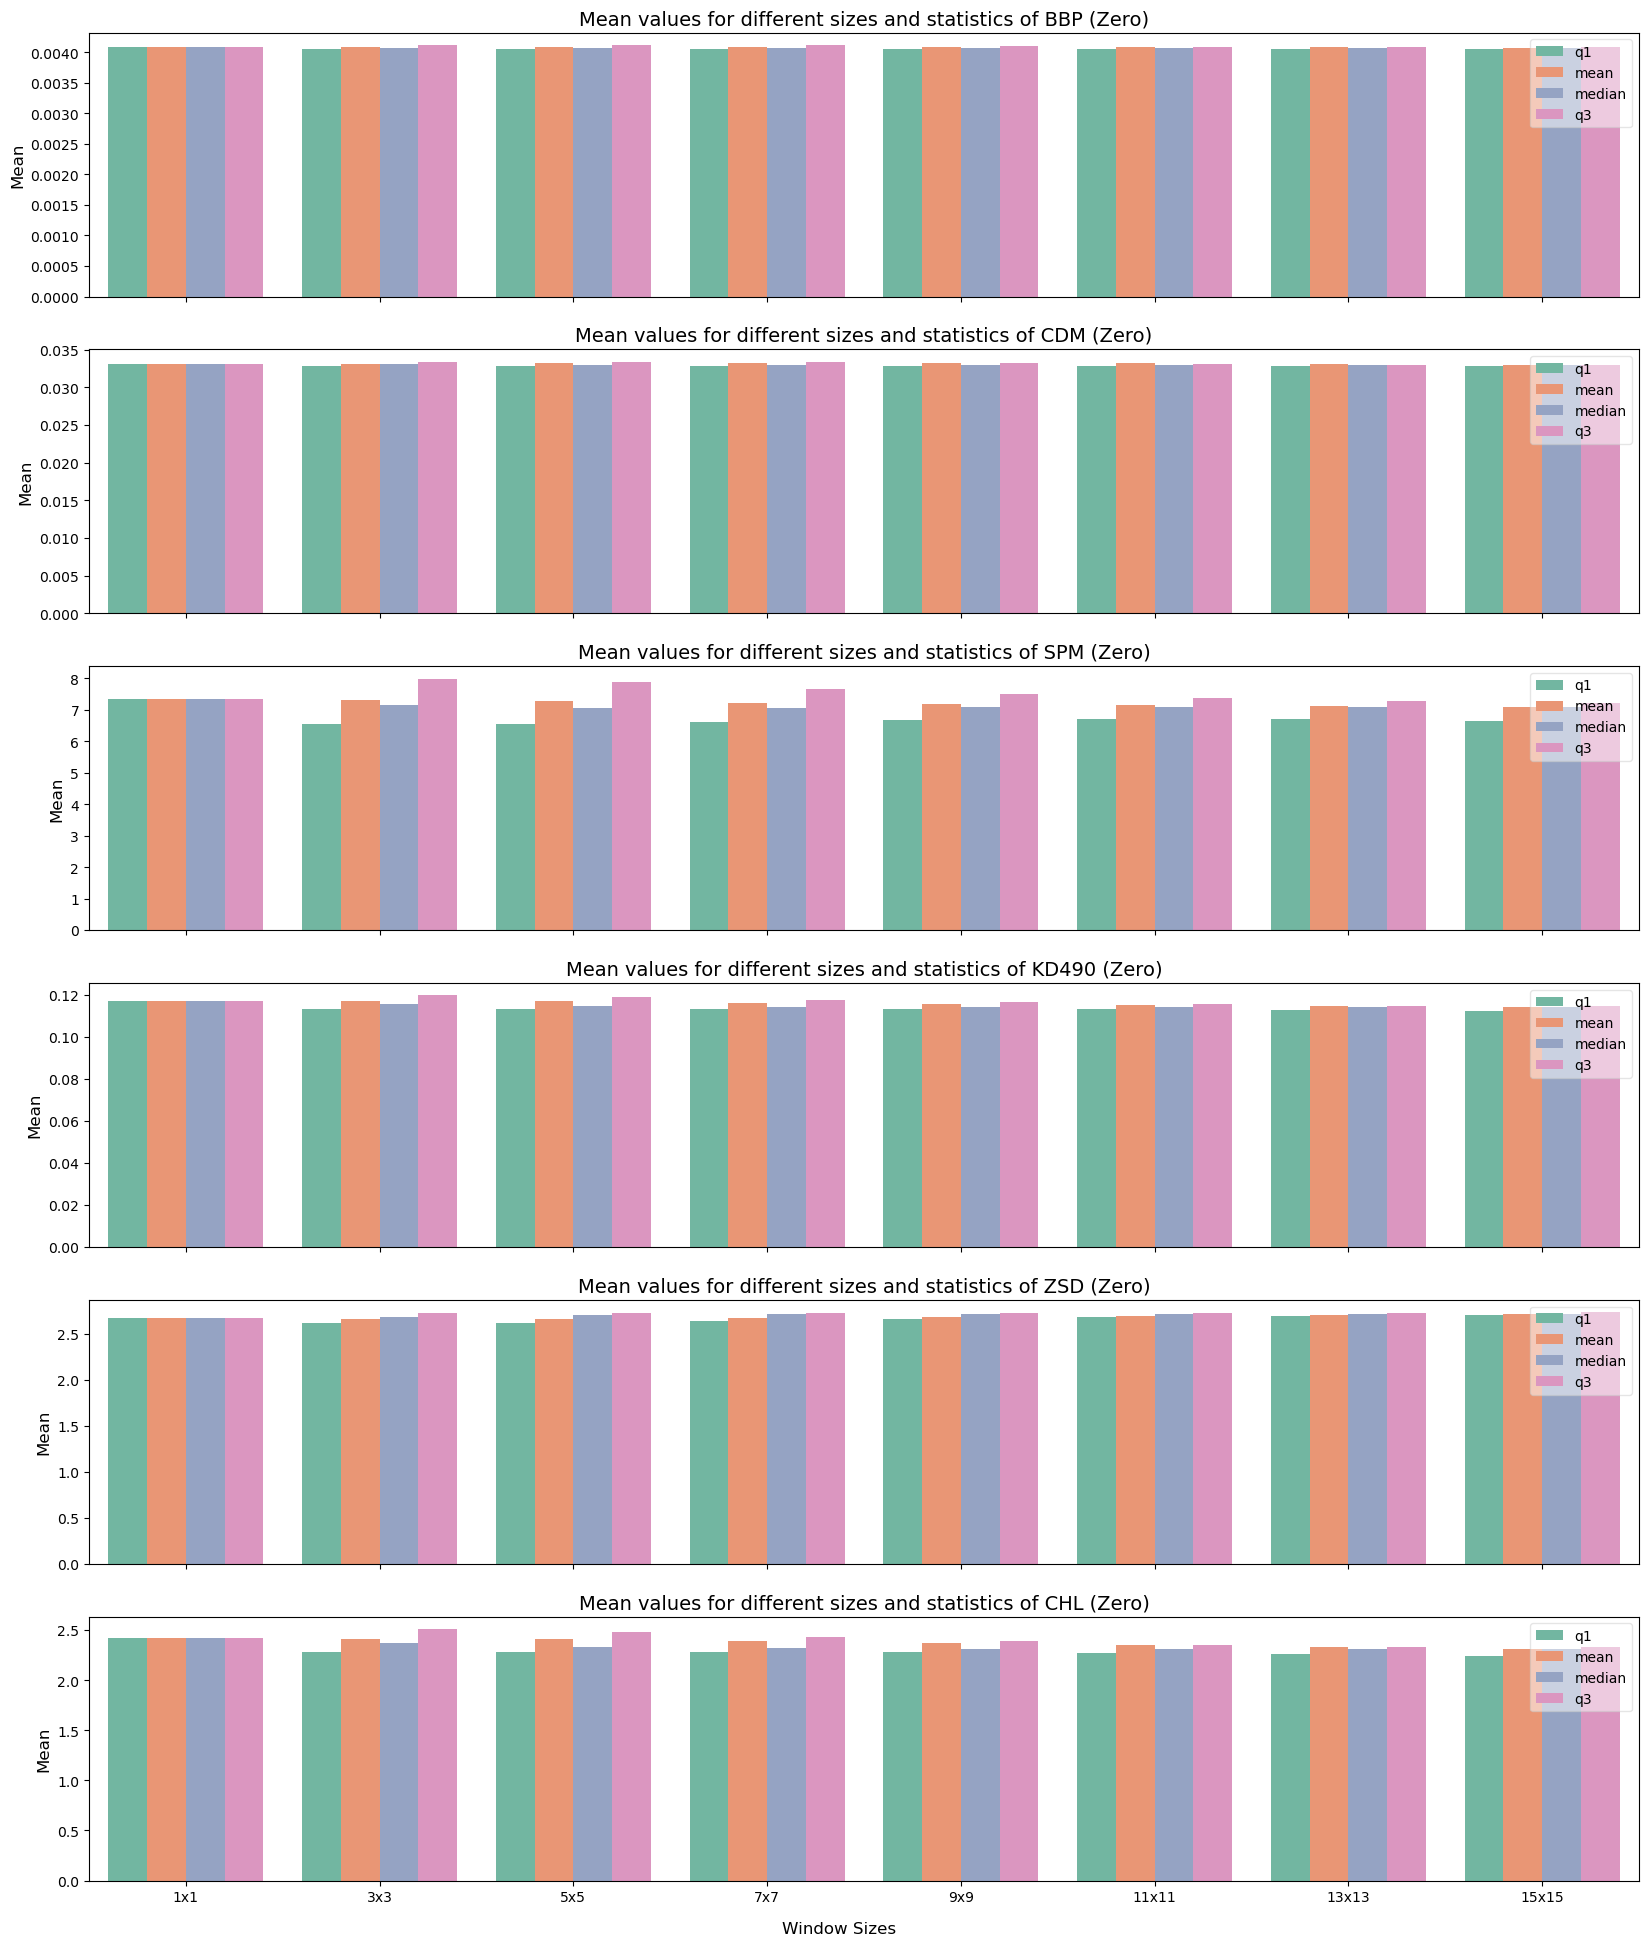

In [10]:
features = feature_mean_zero['feature'].unique()
feature_mean_zero['size_num'] = feature_mean_zero['size'].apply(lambda size_str: int(size_str.split('x')[0]))

sns.set_palette("Set2")

fig, axs = plt.subplots(len(features), 1, figsize=(20, 4 * len(features)), sharex=True)

for idx, feat in enumerate(features):
    feat_data = feature_mean_zero[feature_mean_zero['feature'] == feat].sort_values('size_num')

    sns.barplot(x='size', y='mean', hue='statistics', data=feat_data, ax=axs[idx],
                hue_order=['q1', 'mean', 'median', 'q3'])

    axs[idx].set_title(f'Mean values for different sizes and statistics of {feat} (Zero)', fontsize=14)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('Mean', fontsize=12)
    axs[idx].legend(loc='upper right',framealpha=0.5)

fig.text(0.5, 0.09, 'Window Sizes', ha='center', va='center', fontsize=12)

plt.show()

# RiskLevelLabel vs. 6 Features

In [11]:
df_neg = pd.merge(riskforecasting, feature_neg, on=['site','time'])
df_neg

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,-10.000000,-10.000000,8.102808,0.393628,1.778462,10.588528,-10.000000,...,8.102808,0.393628,1.778462,10.588528,-10.000000,-10.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,-10.000000,-10.000000,1.135922,0.263305,2.588783,5.632908,-10.000000,...,1.135922,0.263305,2.588783,5.632908,-10.000000,-10.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
4,ukc1101-06000,2020-05-18,0,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,-10.000000,-10.000000,7.356489,0.183889,3.869243,3.158081,-10.000000,...,7.356489,0.183889,3.869243,3.158081,-10.000000,-10.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
187108,ukk4307-33900,2022-09-28,0,-10.000000,-10.000000,4.906127,0.142344,5.219365,2.063839,-10.000000,...,4.906127,0.142344,5.219365,2.063839,-10.000000,-10.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,-10.000000,-10.000000,9.181858,0.151466,4.857575,2.291730,-10.000000,...,9.181858,0.151466,4.857575,2.291730,-10.000000,-10.000000,9.181858,0.151466,4.857575,2.291730


In [12]:
df_zero = pd.merge(riskforecasting, feature_zero, on=['site','time'])
df_zero

,site,time,riskLevelLabel,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,...,SPM_15x15_q1,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3
0,ukc1101-06000,2020-05-14,0,0.014399,0.648437,9.016005,0.720255,1.359252,26.936116,0.014399,...,5.846387,0.720255,1.359252,26.936116,0.014399,0.648437,5.846387,0.720255,1.359252,26.936116
1,ukc1101-06000,2020-05-15,0,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528,0.000000,...,8.102808,0.393628,1.778462,10.588528,0.000000,0.000000,8.102808,0.393628,1.778462,10.588528
2,ukc1101-06000,2020-05-16,0,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908,0.000000,...,1.135922,0.263305,2.588783,5.632908,0.000000,0.000000,1.135922,0.263305,2.588783,5.632908
3,ukc1101-06000,2020-05-17,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ukc1101-06000,2020-05-18,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,ukk4307-33900,2022-09-26,0,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081,0.000000,...,7.356489,0.183889,3.869243,3.158081,0.000000,0.000000,7.356489,0.183889,3.869243,3.158081
187107,ukk4307-33900,2022-09-27,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
187108,ukk4307-33900,2022-09-28,0,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839,0.000000,...,4.906127,0.142344,5.219365,2.063839,0.000000,0.000000,4.906127,0.142344,5.219365,2.063839
187109,ukk4307-33900,2022-09-29,0,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730,0.000000,...,9.181858,0.151466,4.857575,2.291730,0.000000,0.000000,9.181858,0.151466,4.857575,2.291730


#### Feature Dataset filled with Neg

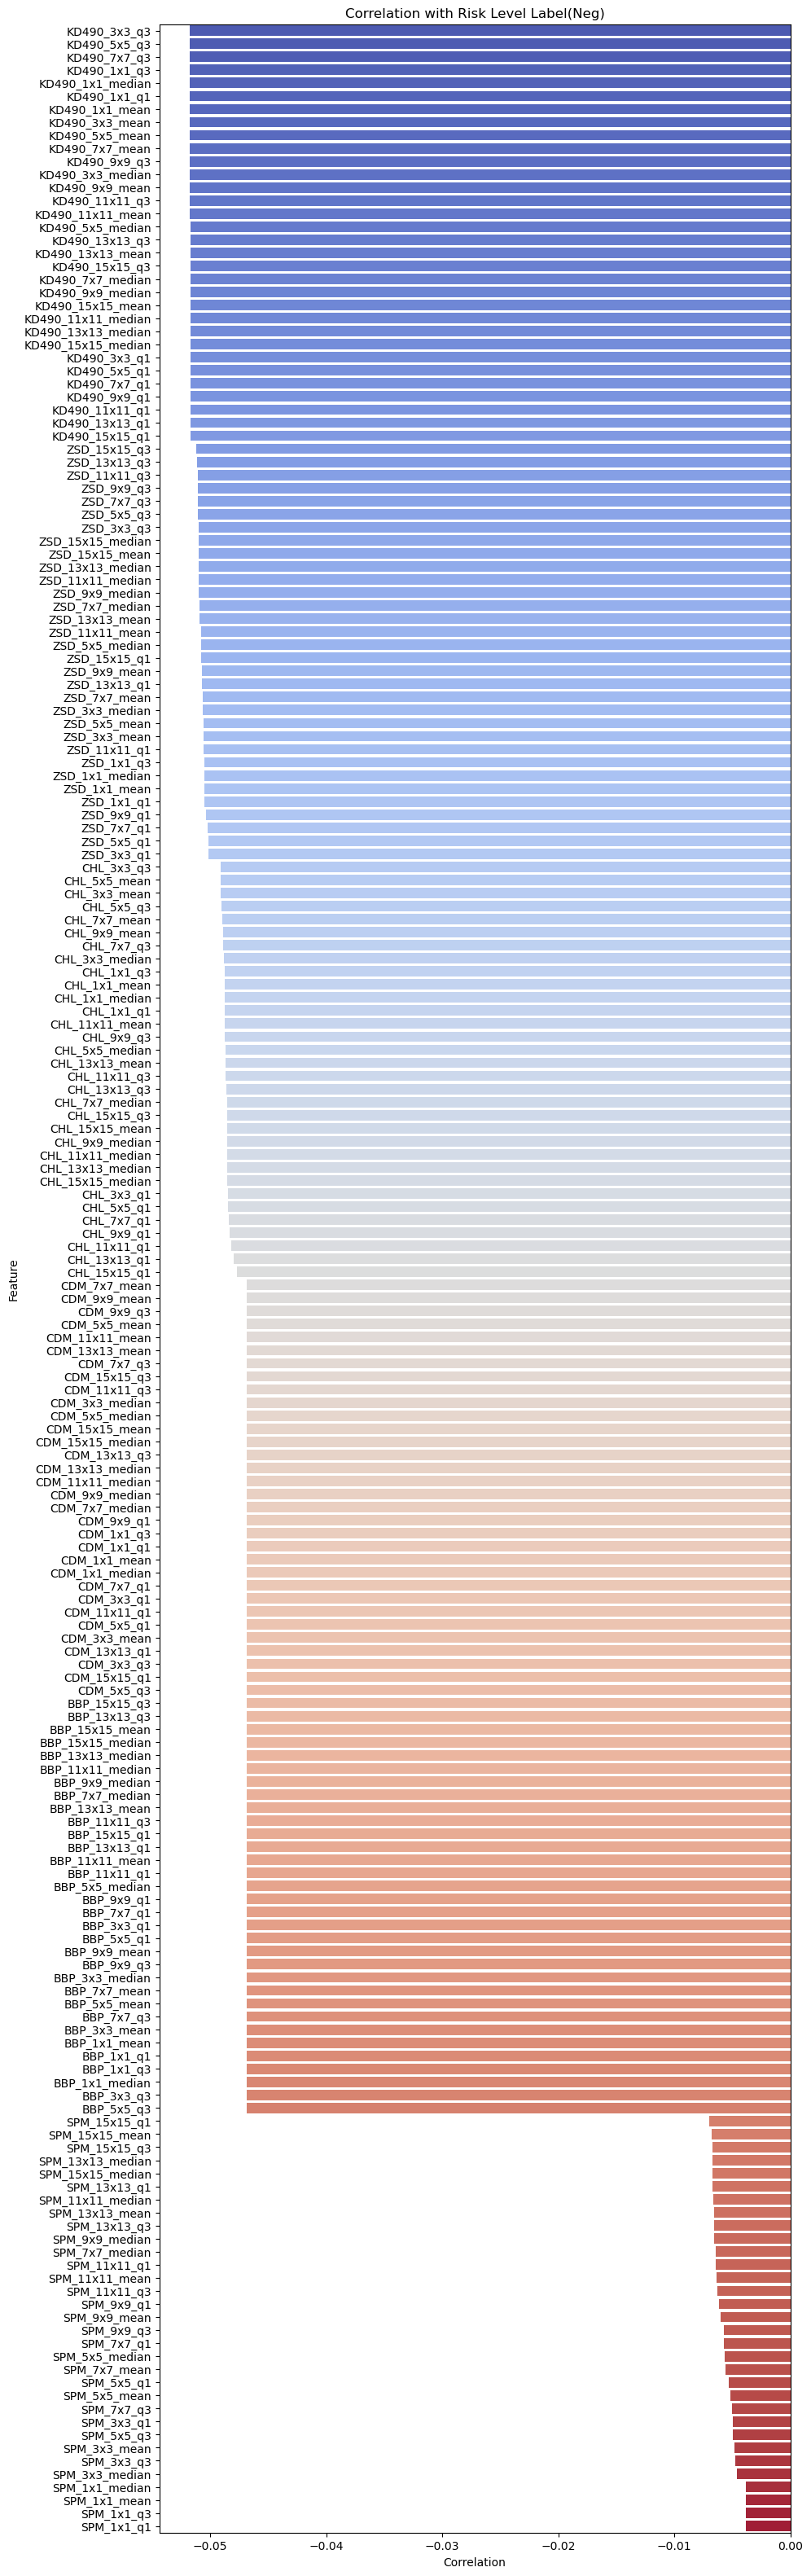

In [13]:
correlation_df_neg = df_neg.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df_neg['riskLevelLabel']).reset_index()
correlation_df_neg.columns = ['Feature', 'Correlation']
correlation_df_neg = correlation_df_neg.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_neg, palette='coolwarm')
plt.title('Correlation with Risk Level Label(Neg)')
plt.show()

#### Feature Dataset filled with Zero

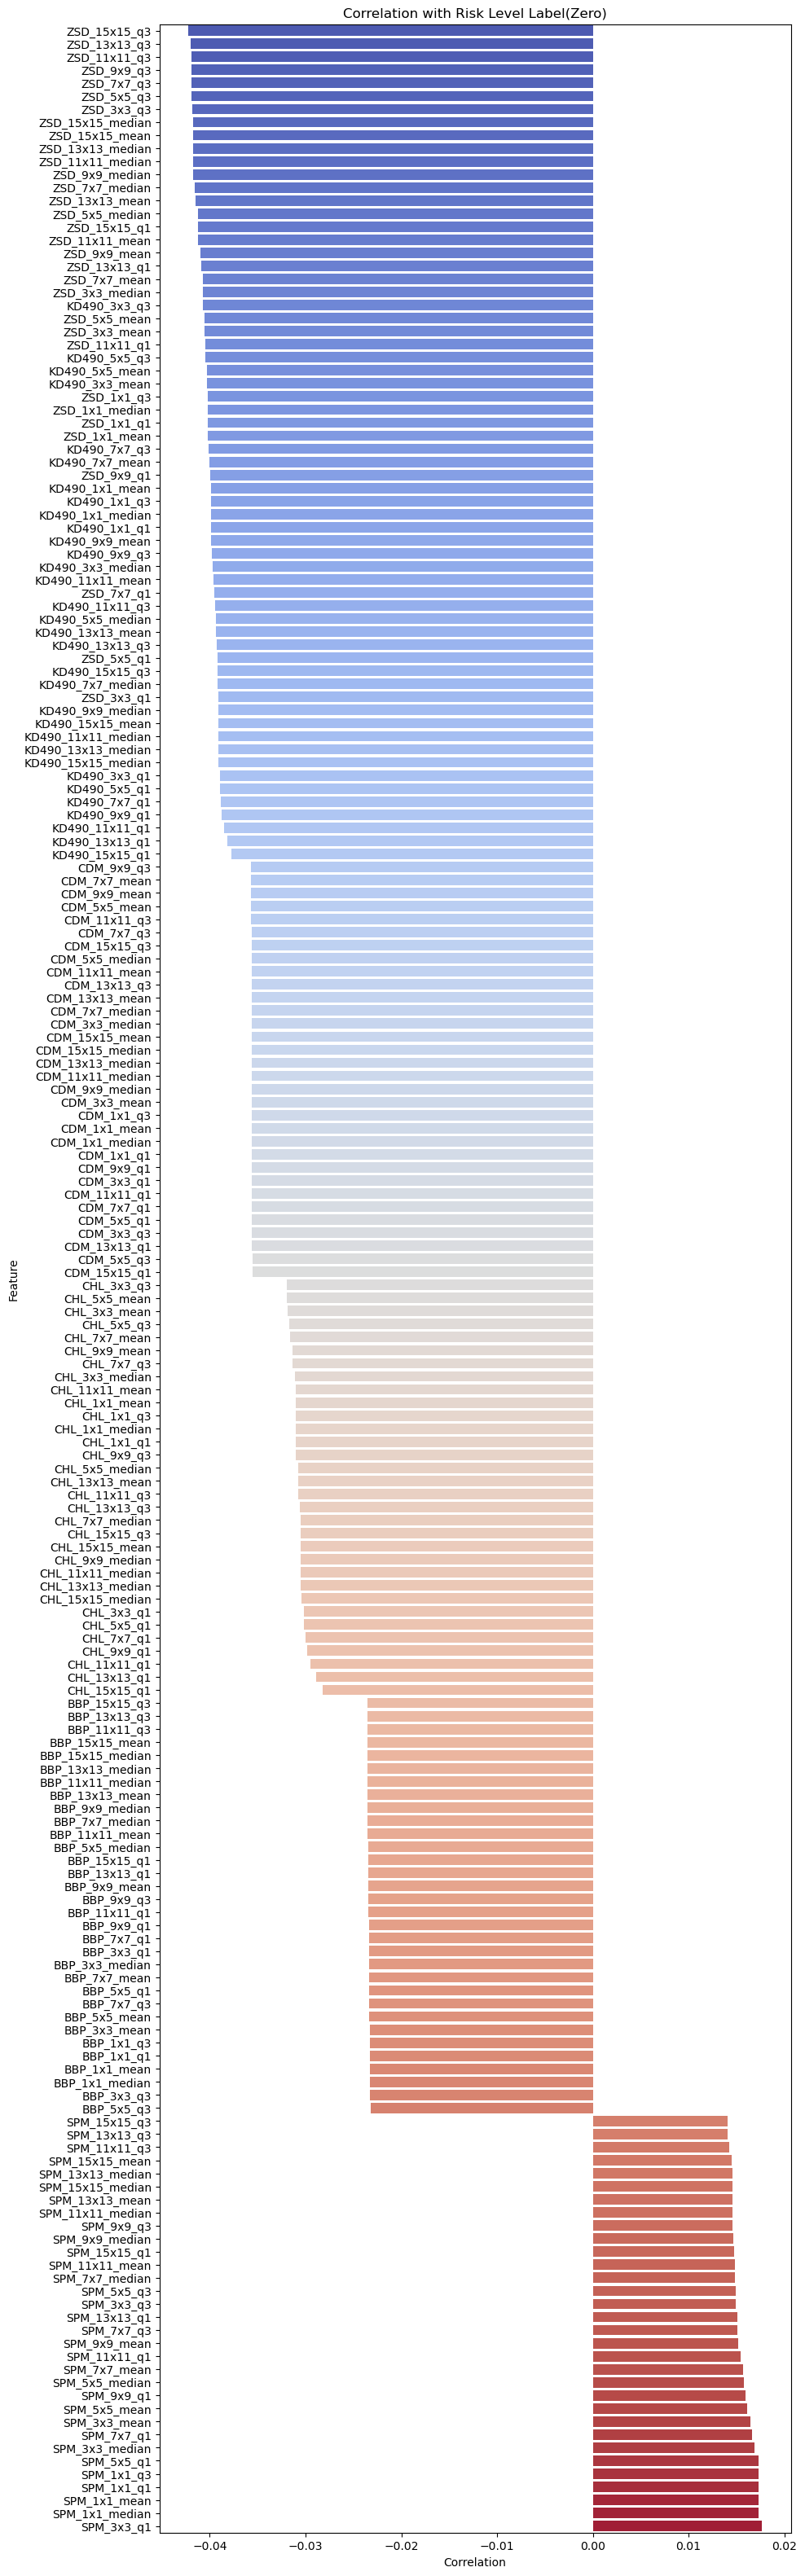

In [14]:
correlation_df_zero = df_zero.drop(columns=['riskLevelLabel', 'time', 'site']).corrwith(df_neg['riskLevelLabel']).reset_index()
correlation_df_zero.columns = ['Feature', 'Correlation']
correlation_df_zero = correlation_df_zero.sort_values(by='Correlation', ascending=True)

plt.figure(figsize=(10, 40))
sns.barplot(x='Correlation', y='Feature', data=correlation_df_zero, palette='coolwarm')
plt.title('Correlation with Risk Level Label(Zero)')
plt.show()

### 15x15 window sized mean¶

#### Feature Dataset filled with Neg

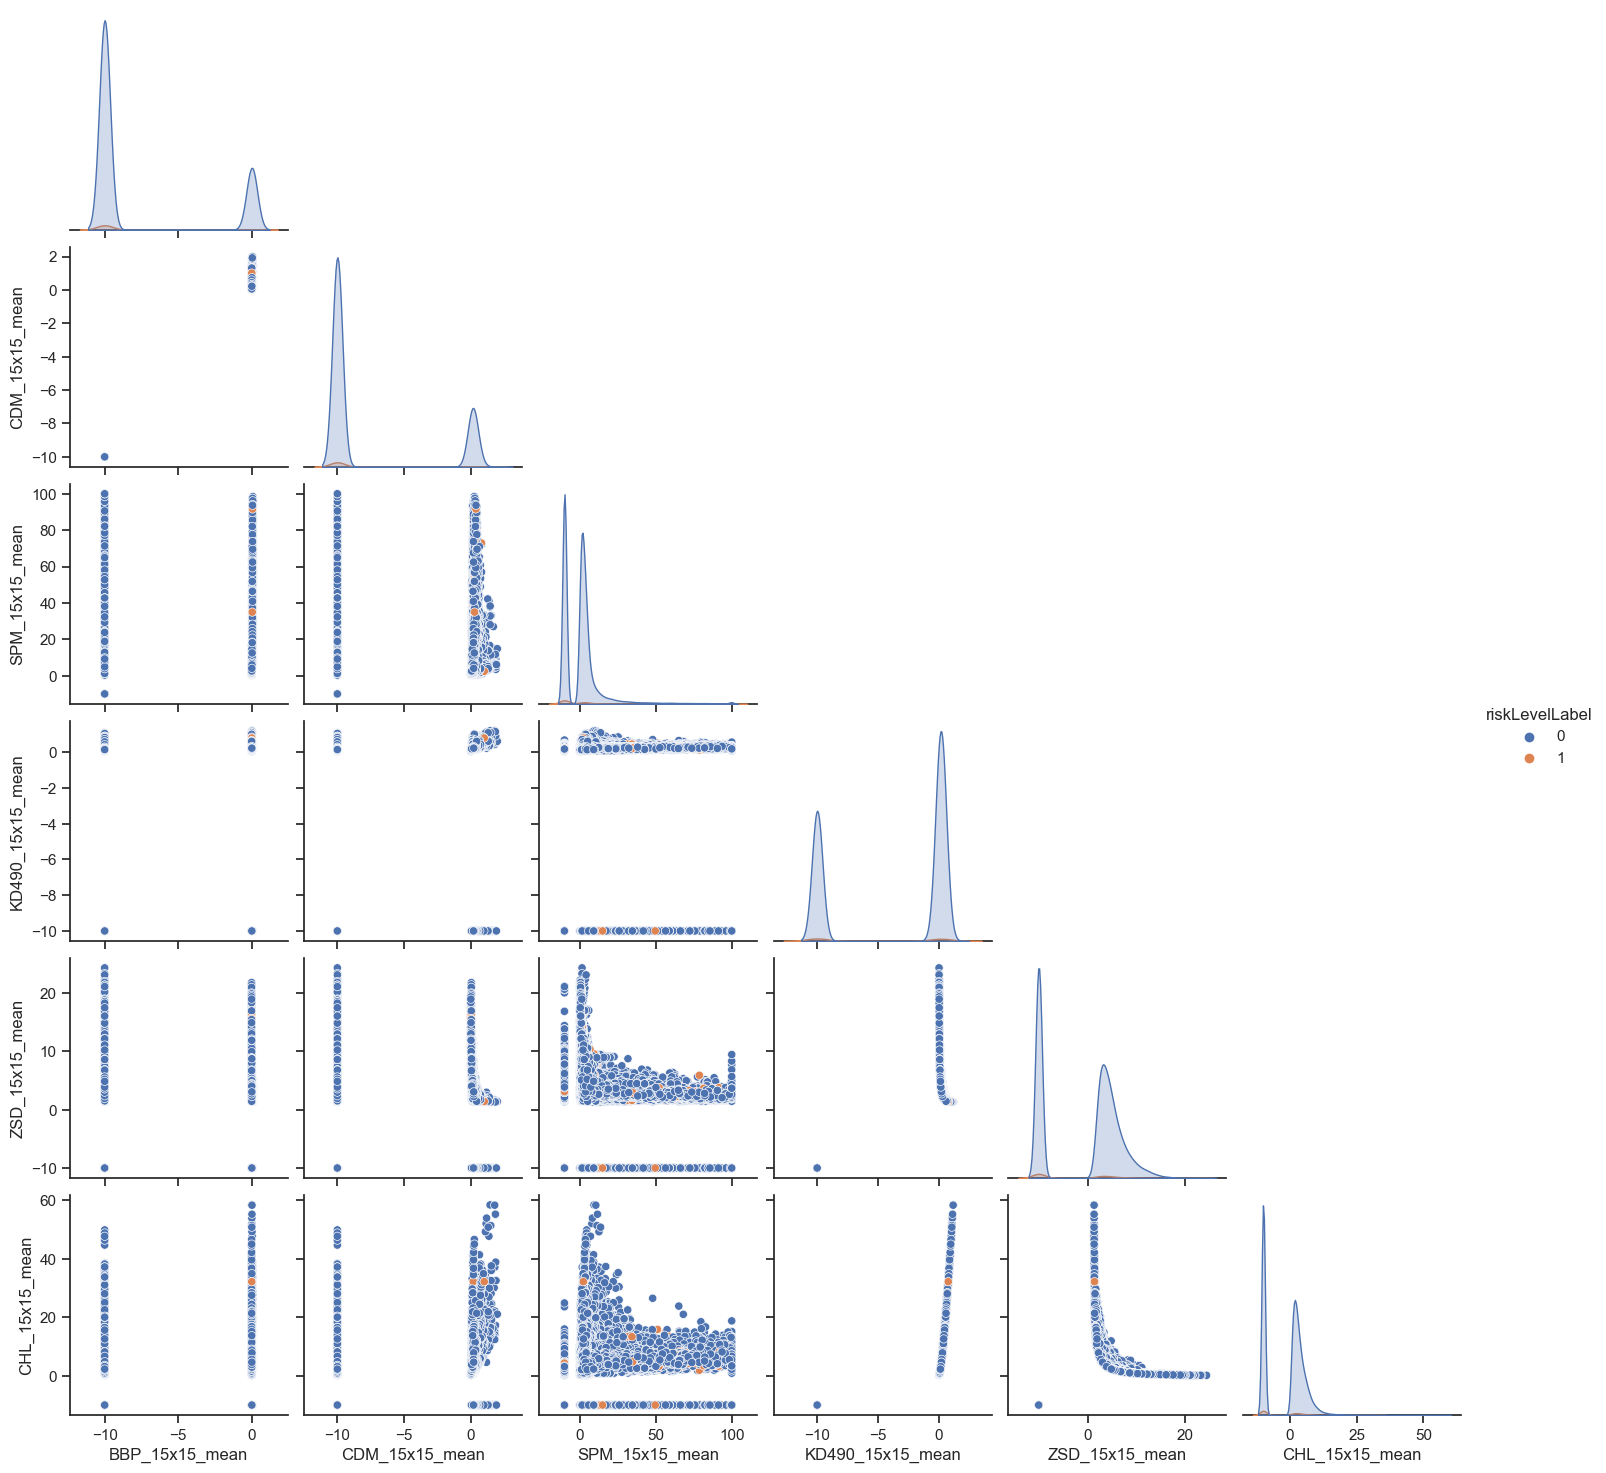

In [25]:
corr_columns_neg = ['riskLevelLabel'] + [col for col in df_neg.columns if col.endswith('15x15_mean')]
subset_df_neg = df_neg[corr_columns_neg].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df_neg, hue='riskLevelLabel', corner=True)

plt.show()

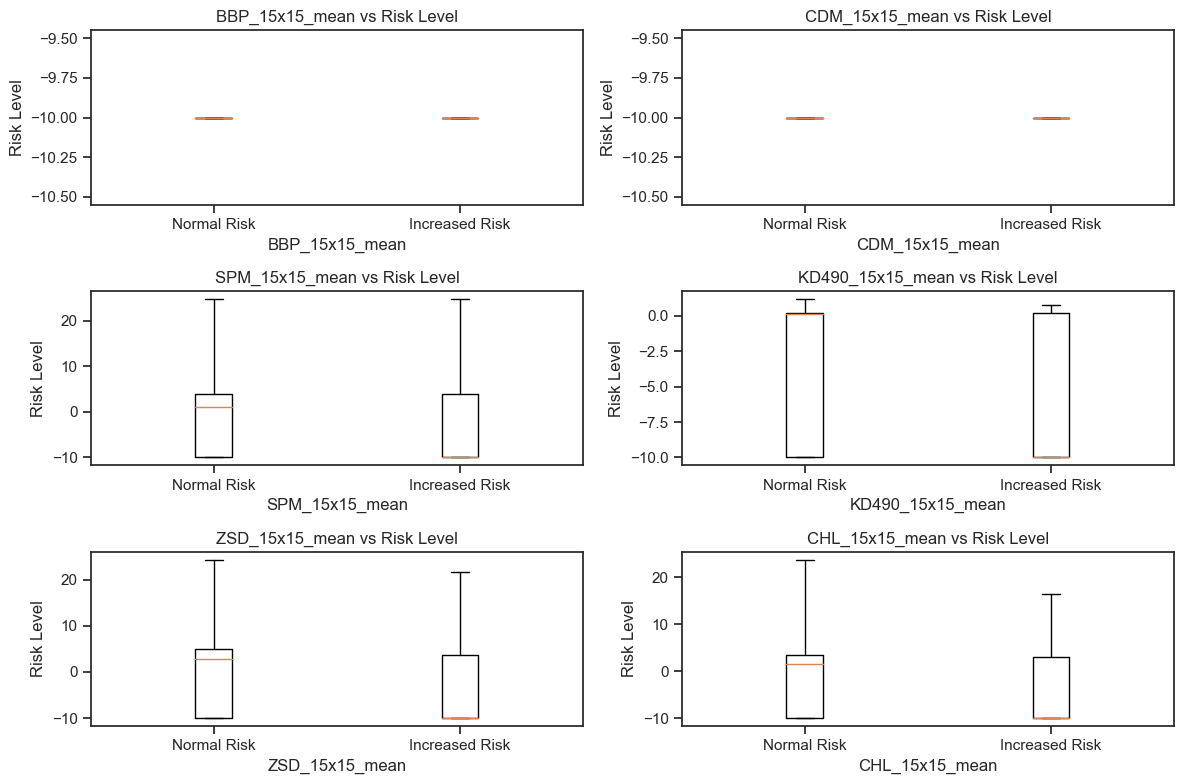

In [22]:
labels = [x for x in df_neg.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df_neg.loc[df_neg["riskLevelLabel"] == 0, labels[i]].dropna(),
                df_neg.loc[df_neg["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()

#### Feature Dataset filled with Zero

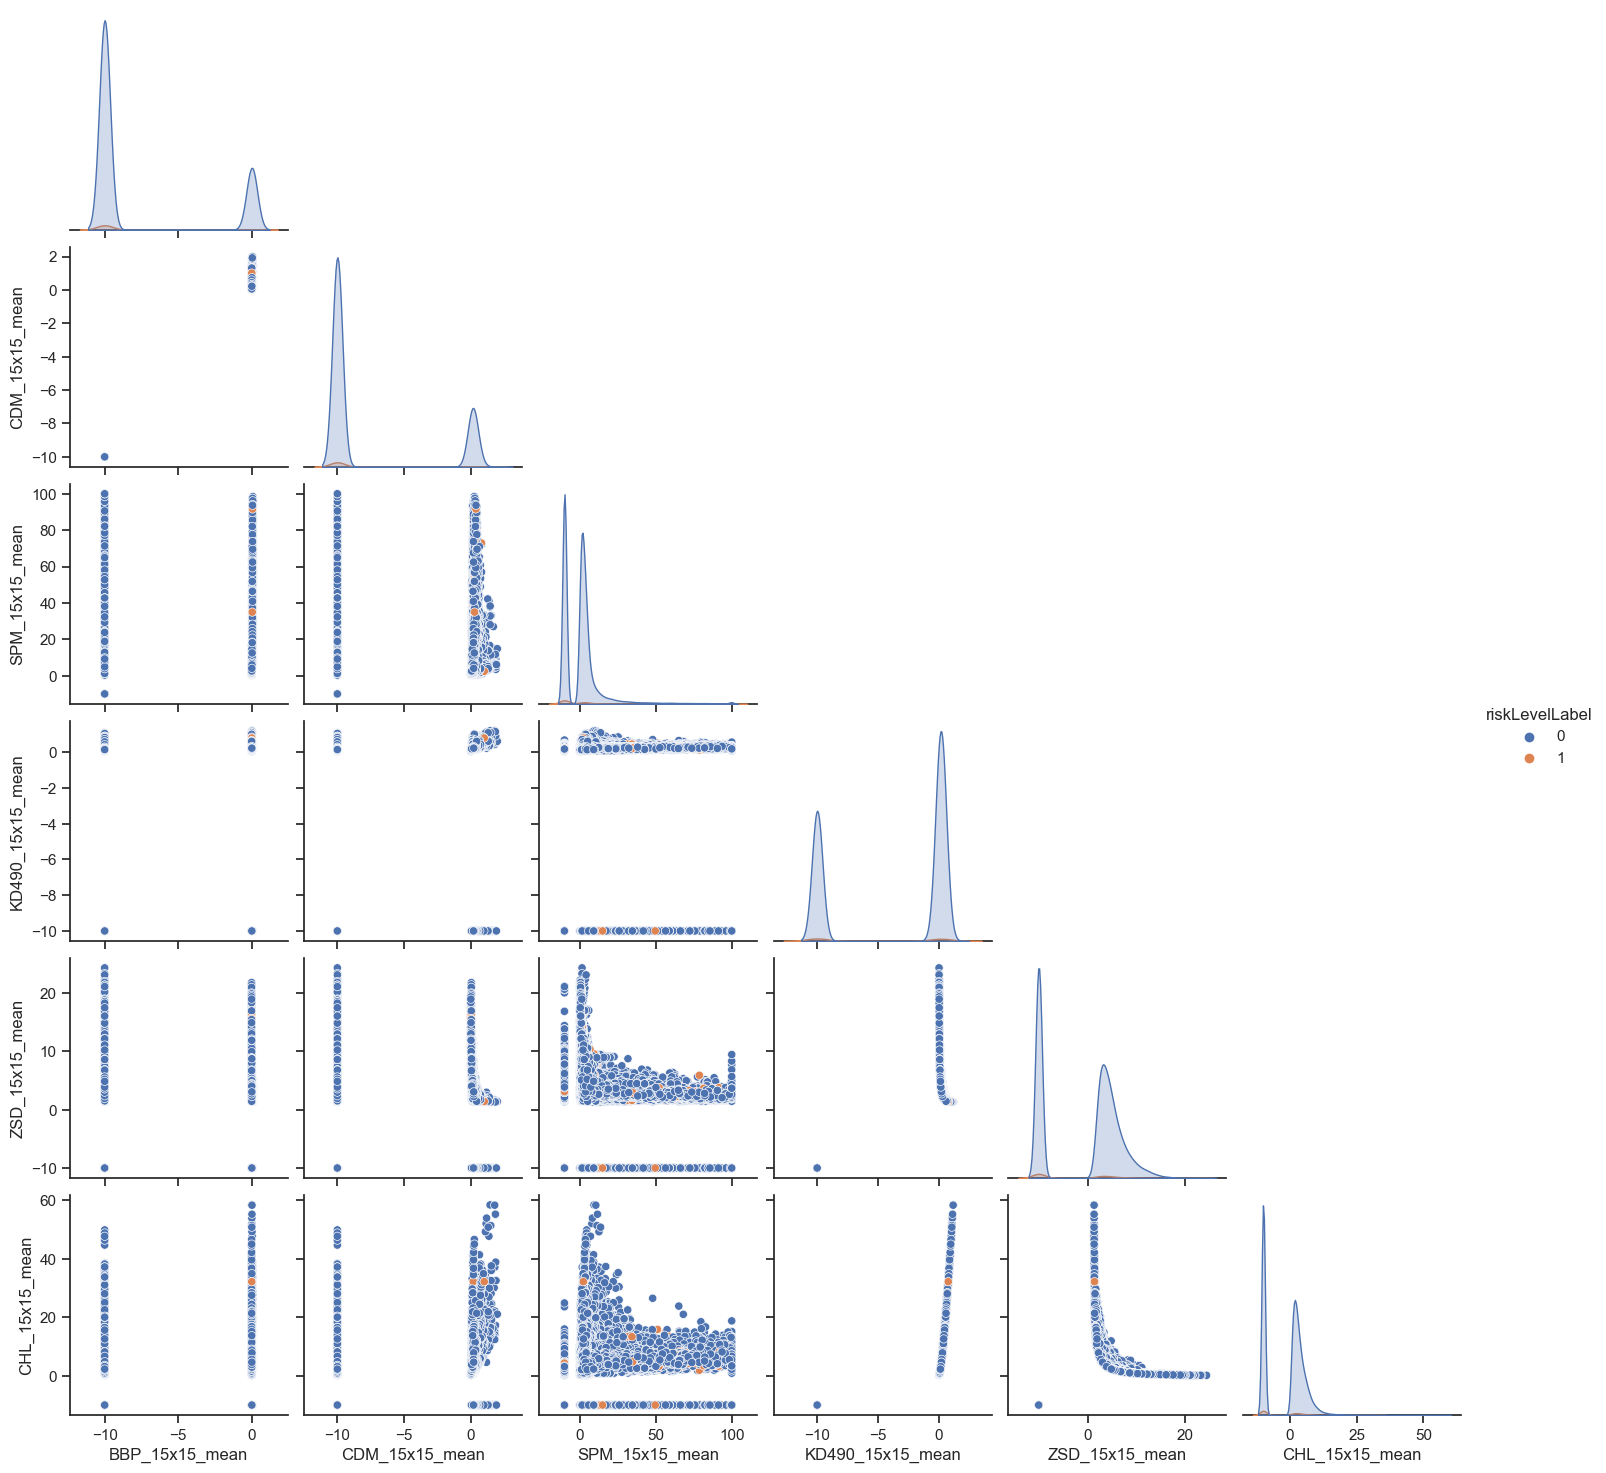

In [23]:
corr_columns_zero = ['riskLevelLabel'] + [col for col in df_zero.columns if col.endswith('15x15_mean')]
subset_df_zero = df_zero[corr_columns_zero].dropna()

sns.set(style='ticks')
sns.pairplot(subset_df_neg, hue='riskLevelLabel', corner=True)

plt.show()

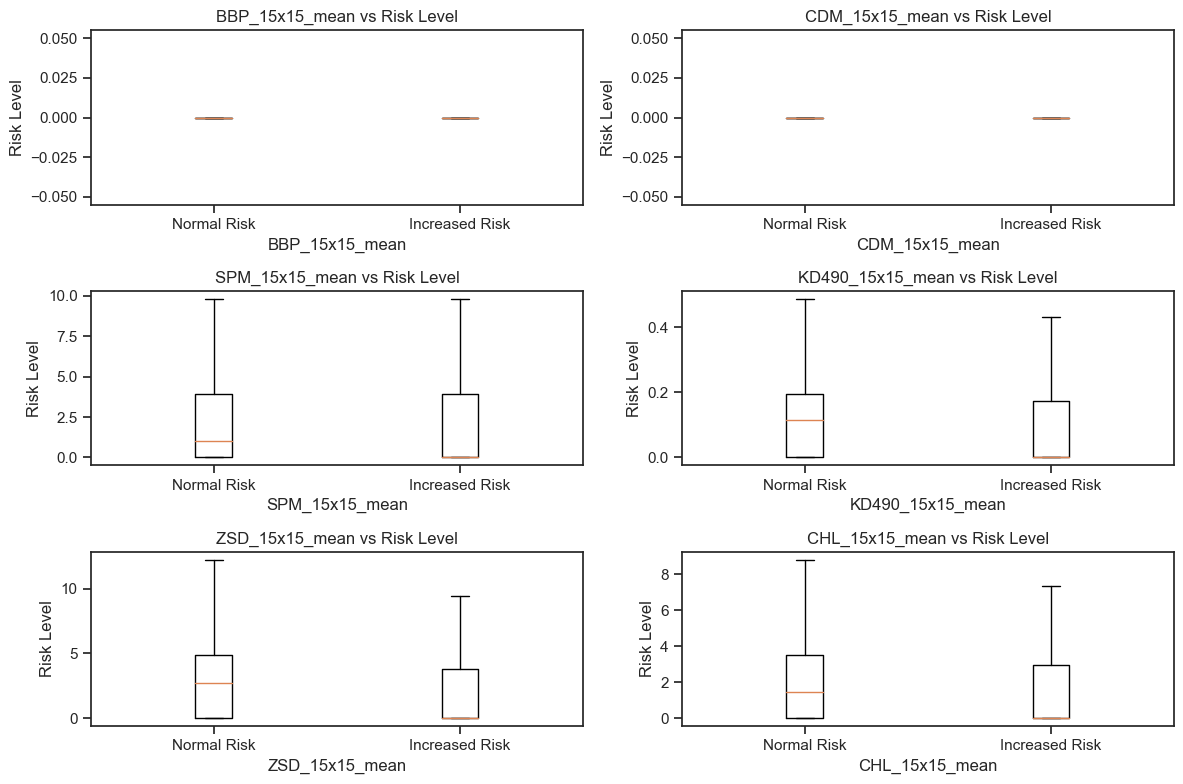

In [24]:
labels = [x for x in df_zero.columns if '15x15_mean' in x]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

for i, column in enumerate(labels):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    ax.boxplot([df_zero.loc[df_zero["riskLevelLabel"] == 0, labels[i]].dropna(),
                df_zero.loc[df_zero["riskLevelLabel"] == 1, labels[i]].dropna()],
               labels=["Normal Risk", "Increased Risk"], showfliers=False)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Risk Level")
    ax.set_title(f"{column} vs Risk Level")

plt.tight_layout()